In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
data = pd.read_csv("data/Early Biomarkers of Parkinson's Disease.csv")
data
#https://www.kaggle.com/datasets/wanghaohan/confused-eeg

#@title Plotting Functions

def plot_observed_vs_predicted(x, y, y_hat, theta_hat):
  """ Plot observed vs predicted data

  Args:
    x (ndarray): observed x values
    y (ndarray): observed y values
    y_hat (ndarray): predicted y values
    theta_hat (ndarray):
  """
  fig, ax = plt.subplots()
  ax.scatter(x, y, label='Observed')  # our data scatter plot
  ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model
  # plot residuals
  ymin = np.minimum(y, y_hat)
  ymax = np.maximum(y, y_hat)
  ax.vlines(x, ymin, ymax, 'g', alpha=0.5, label='Residuals')
  ax.set(
      title=fr"$\hat{{\theta}}$ = {theta_hat:0.2f}, MSE = {np.mean((y - y_hat)**2):.2f}",
      xlabel='x',
      ylabel='y'
  )
  ax.legend()



In [5]:
df = pd.DataFrame(data)

In [6]:
filtered_df = df[df[' Participant  code '].str.startswith('PD')]
filtered_df

,Participant code,Age (years),Gender,Positive history of Parkinson disease in family,Age of disease onset (years),Duration of disease from first symptoms (years),Antidepressant therapy,Antiparkinsonian medication,Antipsychotic medication,Benzodiazepine medication,...,Acceleration of speech timing (-/min2) .1,Duration of pause intervals (ms) .1,Duration of voiced intervals (ms) .1,Gaping in-between voiced Intervals (-/min),Duration of unvoiced stops (ms) .1,Decay of unvoiced fricatives (‰/min) .1,Relative loudness of respiration (dB) .1,Pause intervals per respiration (-) .1,Rate of speech respiration (-/min) .1,Latency of respiratory exchange (ms) .1
0,PD01,58,F,No,56,2,No,No,No,No,...,-2.82,158,318,49.01,22.37,0.588,-19.77,6.0,13.81,127
1,PD02,68,F,No,67,1,No,No,No,No,...,8.20,295,264,40.56,26.88,-0.825,-23.26,4.0,21.77,313
2,PD03,68,M,No,67,1,No,No,No,No,...,4.71,280,317,48.97,22.37,-0.955,-13.29,4.0,22.52,201
3,PD04,75,M,No,73,2,No,No,No,No,...,-9.09,397,800,18.69,49.37,0.791,-25.08,2.0,14.37,151
4,PD05,61,M,Yes,60,0.7,No,No,No,No,...,11.77,206,480,33.54,26.87,0.075,-22.32,5.0,14.61,151
5,PD06,58,M,No,58,1,No,No,No,No,...,13.38,611,398,18.18,49.37,1.488,-25.08,2.0,18.21,593
6,PD07,79,M,No,78,1,No,No,No,No,...,-1.53,251,278,58.90,22.38,0.174,-23.38,5.0,17.85,203
7,PD08,59,F,No,57,2,Yes (Aurorix),No,No,No,...,-4.12,118,269,68.65,17.88,0.554,-17.44,13.5,8.21,116
8,PD09,73,M,No,72,1,No,No,No,No,...,5.25,194,317,53.72,31.37,-0.614,-17.04,4.0,21.25,81
9,PD10,66,M,No,65,1,Yes (Trittico),No,No,No,...,4.99,246,356,38.19,40.37,0.500,-20.20,3.5,15.50,69


In [7]:

print(len(data))


df = data[~data.isin(['-']).any(axis=1)]

print(len(df))

130
30


In [8]:
# age = np.array(filtered_df[' Age  (years) '])
# AccelerationofSpeechTiming = np.array(data[' Acceleration  of  speech  timing  (-/min2) '])
# OnsetAge = np.array(data[' Age  of  disease  onset  (years) '])
# y = np.array(filtered_df[' Acceleration  of  speech  timing  (-/min2) '])
# y = np.array(filtered_df[' Gaping  in-between  voiced  intervals  (-/min) '])
# y = np.array(filtered_df[' Gaping  in-between  voiced  Intervals  (-/min) '])

# print(len(y))
# #plt.scatter(age, y)



# # plt.scatter(age, y)

# # plt.hist(y)
# # plt.xlabel('Value')
# # plt.ylabel('Frequency')
# # plt.title('Histogram')





In [9]:
# x = np.array(filtered_df[' Age  (years) '])
# plt.scatter(x, y, marker='x', c='r')

# w = 1
# b = 10
# print(f"w: {w}")
# print(f"b: {b}")

# def compute_model_output(x, w, b):
#     """
#     Computes the prediction of a linear model
#     Args:
#       x (ndarray (m,)): Data, m examples 
#       w,b (scalar)    : model parameters  
#     Returns
#       y (ndarray (m,)): target values
#     """
#     m = x.shape[0]
#     f_wb = np.zeros(m)
#     for i in range(m):
#         f_wb[i] = w * x[i] + b
        
#     return f_wb

# tmp_f_wb = compute_model_output(x, w, b,)

# # Plot our model prediction
# plt.plot(x, tmp_f_wb, c='b',label='Our Prediction')

# # Plot the data points
# plt.scatter(x, y, marker='x', c='r',label='Actual Values')

# # Set the title
# plt.title("Housing Prices")
# # Set the y-axis label
# plt.ylabel('Price (in 1000s of dollars)')
# # Set the x-axis label
# plt.xlabel('Size (1000 sqft)')
# plt.legend()
# plt.show()


# plt_intuition(x,y)

In [10]:
# def solve_normal_eqn(x, y):
#   """Solve the normal equations to produce the value of theta_hat that minimizes
#     MSE.
#     Args:
#     x (ndarray): An array of shape (samples,) that contains the input values.
#     y (ndarray): An array of shape (samples,) that contains the corresponding
#       measurement values to the inputs.
#   Returns:
#     float: the value for theta_hat arrived from minimizing MSE
#   """

#   # Compute theta_hat analytically
#   theta_hat = (x.T @ y) / (x.T @ x)

#   return theta_hat


# theta_hat = solve_normal_eqn(x, y)
# y_hat = theta_hat * x


# plot_observed_vs_predicted(x, y, y_hat, theta_hat)



In [11]:
# w = 1.15
# b = 0.5
# m = len(x)
# print(m)

# y_hat = w*x+b
# cost = y_hat - y ** 2

# cost_sum = np.sum(cost)

# total_cost = (1 / (2 * m)) * cost_sum
# print(total_cost)





In [12]:
# x_train = np.array([1.0, 2.0])           #(size in 1000 square feet)
# y_train = np.array([10.0,50.0])           #(price in 1000s of dollars)

# plt_intuition(x_train,y_train)

In [13]:
# x_train = np.array([1.0, 2.0])           #(size in 1000 square feet)
# y_train = np.array([300.0, 500.0])           #(price in 1000s of dollars)

In [14]:
# def compute_cost(x, y, w, b): 
#     """
#     Computes the cost function for linear regression.
    
#     Args:
#       x (ndarray (m,)): Data, m examples 
#       y (ndarray (m,)): target values
#       w,b (scalar)    : model parameters  
    
#     Returns
#         total_cost (float): The cost of using w,b as the parameters for linear regression
#                to fit the data points in x and y
#     """
#     # number of training examples
#     m = x.shape[0] 
    
#     cost_sum = 0 
#     for i in range(m): 
#         f_wb = w * x[i] + b   

#         cost = (f_wb - y[i]) ** 2  
#         cost_sum = cost_sum + cost  
#     total_cost = (1 / (2 * m)) * cost_sum  

#     return total_cost

In [15]:
# compute_cost(x_train,y_train,150,100)


In [16]:
# x = np.array([1.0, 2.0])           #(size in 1000 square feet)
# y = np.array([300.0, 500.0])           #(price in 1000s of dollars)
# w=150
# b=100


# m = x.shape[0] 
    
# cost_sum = 0 

# f_wb = w * x + b   

# cost = (f_wb - y) ** 2

# cost_sum = np.sum(cost)
# total_cost = (1 / (2 * m)) * cost_sum  

# print(total_cost)

In [17]:
# age = np.array(filtered_df[' Age  (years) '])
# AccelerationofSpeechTiming = np.array(data[' Acceleration  of  speech  timing  (-/min2) '])
# OnsetAge = np.array(data[' Age  of  disease  onset  (years) '])
# y = np.array(filtered_df[' Acceleration  of  speech  timing  (-/min2) '])
# y = np.array(filtered_df[' Latency  of  respiratory  exchange  (ms) '])
# print(len(y))
# #plt.scatter(age, y)



# #plt.scatter(age, y)

# plt.hist(y)
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.title('Histogram')





In [18]:
# plt.scatter(y,x)

In [19]:
aData = pd.read_csv("data/EEG_data.csv")
aData

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9.0,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,1.0,0.0
12807,9.0,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,1.0,0.0
12808,9.0,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,1.0,0.0
12809,9.0,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,1.0,0.0


38.056986729117874

videoId:  1 	mean:  50741.32390381896

videoId:  2 	mean:  45711.39638932496

videoId:  3 	mean:  39207.293532338306

videoId:  4 	mean:  54195.83849557522

videoId:  5 	mean:  33429.015447154474

videoId:  6 	mean:  34112.49703640982

videoId:  7 	mean:  24796.997451146985

videoId:  8 	mean:  30126.49453125

videoId:  9 	mean:  29724.211553473848
[50741.32390382 45711.39638932 39207.29353234 54195.83849558
 33429.01544715 34112.49703641 24796.99745115 30126.49453125
 29724.21155347]

videoId:  4 	mean:  42.02212389380531


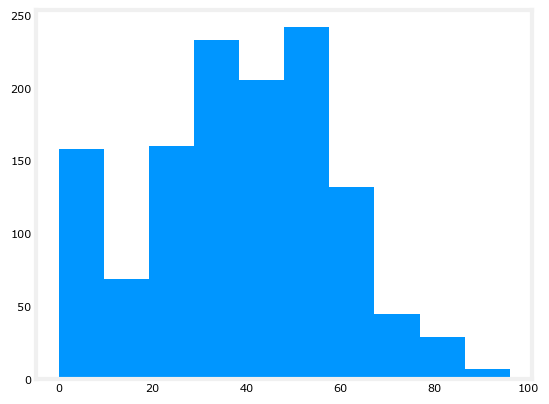

In [78]:
# condition = aData[:, 1] == 0.0
# condition

# Choose entries with id p01
df_0 = aData[aData['VideoID'] == 9]
df_0

df_0_Attention = np.array(df_0['Attention'])
df_0_AttentionAverage = np.mean(df_0_Attention)

plt.hist(df_0_Attention)
print(df_0_AttentionAverage)

attentionArrayMean = np.array([])

videoId = 1
while videoId <=9:
    arr = aData[aData['VideoID'] == videoId]
    arrC = np.array(arr['Beta2'])
    mean = np.average(arrC)
    print("\nvideoId: ",videoId, "\tmean: ", mean)
    attentionArrayMean = np.append(attentionArrayMean,mean)
    videoId+=1


print(attentionArrayMean)

xvdeii = 4
arr = aData[aData['VideoID'] == xvdeii]
arrC = np.array(arr['Attention'])
mean = np.average(arrC)
print("\nvideoId: ",xvdeii, "\tmean: ", mean)
    
#plt.boxplot(df_0_Attention)
#plt.show()

# print(df_0_Attention)
 


# ax = np.array(df_0['VideoID'])



# ay = np.array(df_0['Delta'])

#plt.scatter(ax,ay)




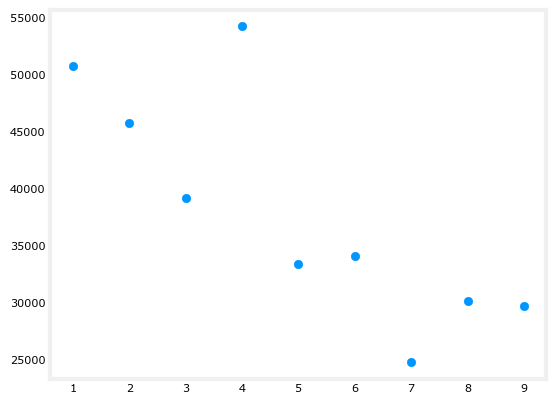

In [81]:
axx = np.array([1,2,3,4,5,6,7,8,9])
plt.scatter(axx,attentionArrayMean)